In [1]:
pip install -U pandas-profiling

     |████████████████████████████████| 133kB 3.1MB/s 
     |████████████████████████████████| 614kB 45.9MB/s 
     |████████████████████████████████| 235kB 43.8MB/s 
     |████████████████████████████████| 307kB 52.8MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 215kB 53.1MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 737kB 35.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=d17b6025e5a36867bc3973c6afb58ccd6004e40dd3ae81818cc6276041f6fbc5
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=95131a225dafdb4253f163a979ef7344d289d72b18bc40f335d086561d208556
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created whee

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
from google.colab import files
uploaded = files.upload()

Saving pd v2.0.xlsx to pd v2.0.xlsx


In [0]:
df = pd.read_excel('pd v2.0.xlsx')

In [6]:
df.shape

(901, 20)

In [0]:
pd_data = df.drop(labels = ['Sr. no.', 'Market Sector'], axis=1)

In [0]:
import pandas_profiling


profile = pd_data.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="data_pandas_profiling.html")

In [10]:
pd_data.columns

Index(['National_Long_Term_Rating', 'Revenue', 'Gross_Margin',
       'Times_Interest_Earned', 'Capital_Employed',
       'Profit_before_taxes_to_Employed_capital',
       'Operating_Margin_to_Sales_and_other_income',
       'Earnings_before_Interest_and_Taxes_to_Sales_and_other_income',
       'Sales_and_other_income_to_Employed_Capital',
       'Sales_and_other_income_to_Equity',
       'Equity_and_Long_Term_Loans_to_Net_Fixed_Assets', 'DEBT_TO_EQUITY',
       'Equity_to_Employed_Capital',
       'Working_Capital_to_Short_Term_obligations', 'Immediate_Cash_Ratio',
       'Debtors_Ratio', 'Stock_turnover_Ratio', 'Working_Capital'],
      dtype='object')

In [0]:
y = pd_data['National_Long_Term_Rating']
x = pd_data.drop(labels = 'National_Long_Term_Rating',axis=1)

In [0]:
sm = SMOTE(k_neighbors=1)
x, y = sm.fit_sample(x, y)

In [0]:
#df1 = pd.DataFrame(x)
#df2 = pd.DataFrame(y)
#df2.shape
df3 = pd.DataFrame(x)

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
import math
from sklearn.metrics import accuracy_score

Normalize Data

In [18]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

df1=pd.DataFrame()
for i in df3.columns[1:]:
    df1[i] = normalize(df3[i])
    df1.describe()
df1.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.759994,0.002642,0.020677,0.654620,0.761864,0.526658,0.031499,0.136229,0.001119,0.293644,0.417564,0.508256,0.004802,0.024165,0.021753,0.651213
1,0.753330,0.002654,0.020391,0.595826,0.755142,0.521660,0.025842,0.121041,0.001187,0.289177,0.526041,0.504321,0.006464,0.144043,0.034034,0.650272
2,0.762916,0.002591,0.020564,0.631839,0.764752,0.528909,0.027133,0.123650,0.002134,0.290104,0.489375,0.512054,0.014766,0.241433,0.047154,0.654675
3,0.806760,0.002695,0.026532,0.641491,0.805989,0.563325,0.022618,0.117527,0.001253,0.288852,0.540555,0.518664,0.006351,0.360365,0.003374,0.681803
4,0.790499,0.005195,0.020871,0.697430,0.791820,0.548973,0.026247,0.123336,0.001238,0.288877,0.469327,0.506495,0.005152,0.301000,0.003445,0.640480


In [16]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

df2=pd.DataFrame()
for i in df3.columns[1:]:
    df2[i] = sigmoid(df3[i])
    df2.describe()
df2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.982322,0.793384,1.0,1.000000,0.982322,0.982322,0.998521,0.999999,0.834650,0.740672,0.618223,0.473003,0.656390,1.0,1.000000,1.038830e-07
1,0.913707,0.802646,1.0,0.999492,0.912894,0.912894,0.961876,0.976923,0.920309,0.539995,0.703043,0.456684,0.704834,1.0,1.000000,1.601084e-08
2,0.991374,0.752211,1.0,1.000000,0.991289,0.991582,0.981622,0.995609,0.999999,0.585373,0.675561,0.488811,0.879255,1.0,1.000000,1.010292e-04
3,1.000000,0.830326,1.0,1.000000,1.000000,1.000000,0.794911,0.815245,0.962532,0.523910,0.713541,0.516354,0.701655,1.0,0.999977,1.000000e+00
4,0.999991,0.999998,1.0,1.000000,0.999989,0.999990,0.969631,0.994632,0.955149,0.525147,0.659991,0.465694,0.666888,1.0,0.999981,5.662959e-17


In [19]:
import numpy as np
df4=pd.DataFrame()
for i in df1.columns[1:]:
    df4[i] = np.log(df1[i]+1)
    
# print(df3.describe())
df4.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.002638,0.020467,0.503571,0.566372,0.423081,0.031013,0.127714,0.001118,0.257463,0.348940,0.410954,0.004791,0.023877,0.021520,0.501510
1,0.002651,0.020186,0.467391,0.562550,0.419802,0.025514,0.114258,0.001186,0.254004,0.422677,0.408342,0.006443,0.134568,0.033468,0.500940
2,0.002587,0.020356,0.489708,0.568010,0.424555,0.026772,0.116582,0.002132,0.254723,0.398357,0.413469,0.014658,0.216266,0.046076,0.503605
3,0.002691,0.026186,0.495605,0.591109,0.446815,0.022366,0.111118,0.001252,0.253752,0.432143,0.417831,0.006331,0.307753,0.003369,0.519866
4,0.005182,0.020657,0.529116,0.583232,0.437592,0.025909,0.116303,0.001237,0.253771,0.384804,0.409786,0.005138,0.263133,0.003439,0.494989


In [0]:
#pd_data.columns
class_names = ['Revenue', 'Operating_Profit', 'Interest_Expense',
       'Net_Income', 'Cash_generated_by_operations', 'Working_Capital_(+/-)',
       'Opening_debt', 'Closing_debt', 'Cash_and_Marketable_Securities',
       'Accounts_Receivable/Trade_Debtors', 'Inventory',
       'Other_Current_Assets', 'Property, Plant_&_Equipment',
       'Intangible_Assets', 'Other_Non-current_Assets',
       'Short-term_Debt(inc.CPLTD)', 'Accounts_Payable/Trade_Creditors',
       'Other_Short-term_Liabilities', 'Long-term_Unsecured_Debt',
       'Long-term_Secured_Debt', 'Provisions', 'Equity_Capital_&_Reserves']
#matrix = confusion_matrix(y_test, pred)
#df5 = pd.DataFrame(df4, columns=class_names)
#df5.head()

In [0]:
# pandas profilig after log transformation
# import pandas_profiling


# profile = df3.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="data_pandas_profiling.html")

In [0]:
### Split data into training and validation data
from sklearn.metrics import confusion_matrix
### Split train data into train and dev data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df4,y,test_size=0.2,random_state = 23)

In [0]:
#from sklearn.metrics import classification_report
#from sklearn.preprocessing import MinMaxScaler
#min_max_mod = MinMaxScaler()
#min_max_mod.fit(x_train)
#x_train_min_max = min_max_mod.transform(x_train)
#x_test_min_max = min_max_mod.transform(x_test)

#print(x_train_min_max)

In [0]:
#x_train_1 = pd.DataFrame(x_train)
#x_train_1.head()


In [0]:
#x_train.info()

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
import math
from sklearn.metrics import accuracy_score



In [27]:
#from sklearn.multiclass import OneVsRestClassifier
model1 = LogisticRegression(random_state=None, solver='lbfgs', max_iter = 1000,
                         multi_class='multinomial', penalty='l2')
model1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_predict = model1.predict(x_train)
print(model1.score(x_train, y_train))

0.24074074074074073


In [29]:
y_test_predict = model1.predict(x_test)
print(model1.score(x_test, y_test))

0.2275132275132275


In [30]:
accuracy_score(y_test,y_test_predict)

0.2275132275132275

In [32]:
#@title 
# Predicting the Test set results
y_logit_pred = model1.predict(x_test)

# Making the Confusion Matrix
mat=pd.crosstab(y_test, y_logit_pred, rownames=['Actual PD rating'], colnames=['Predicted PD rating'])
print(mat)

Predicted PD rating  B  B+  B-  BB  BB-  BBB  BBB+  BBB-  D
Actual PD rating                                           
B                    8   2   5   0    2    1    12     0  7
B+                   8   2   9   0    8    0     6     0  7
B-                   1   0  21   0    4    0    11     0  5
BB                   4   1   4   1    6    0    14     1  8
BB+                  3   0   1   0    5    0    18     2  9
BB-                  4   0   5   0    4    1     8     0  7
BBB                  0   0   9   0    2    0    26     3  6
BBB+                 0   0   0   0    0    0    39     0  0
BBB-                 4   0   1   1    7    0    19     2  5
D                    2   0   9   0    3    0     6     0  9


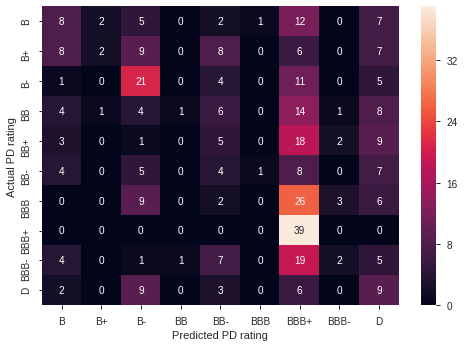

In [33]:
import seaborn as sns
sns.heatmap(mat,annot=True)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score



In [35]:
model2 = RandomForestClassifier(class_weight=None, n_estimators = 100, criterion = 'entropy', random_state = 18)
model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=18, verbose=0,
                       warm_start=False)

In [36]:
#@title 
# Predicting the Test set results
y_random_pred = model2.predict(x_test)

# Making the Confusion Matrix
mat=pd.crosstab(y_test, y_random_pred, rownames=['Actual PD rating'], colnames=['Predicted PD rating'])
print(mat)

Predicted PD rating   B  B+  B-  BB  BB+  BB-  BBB  BBB+  BBB-   D
Actual PD rating                                                  
B                    34   1   0   2    0    0    0     0     0   0
B+                    2  26   0   1    0    8    0     0     0   3
B-                    0   0  42   0    0    0    0     0     0   0
BB                    1   3   0  13   10    4    0     0     2   6
BB+                   0   0   0   7   17    7    0     2     4   1
BB-                   1   8   1   2    3   11    0     0     1   2
BBB                   0   0   0   0    0    0   46     0     0   0
BBB+                  0   0   0   0    0    0    0    39     0   0
BBB-                  0   1   0   4    2    2    0     0    29   1
D                     0   1   0   0    2    2    0     0     0  24


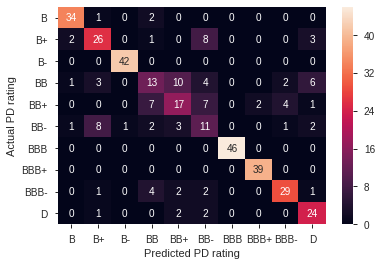

In [37]:
import seaborn as sns
sns.heatmap(mat,annot=True)


In [38]:

accuracy_score(y_test, y_random_pred)


0.7433862433862434

In [0]:
#model2.score(x_train,y_test)

In [39]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_depth=2, random_state=23)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.681
Accuracy score (validation): 0.534
Learning rate:  0.075
Accuracy score (training): 0.726
Accuracy score (validation): 0.593
Learning rate:  0.1
Accuracy score (training): 0.767
Accuracy score (validation): 0.603
Learning rate:  0.25
Accuracy score (training): 0.895
Accuracy score (validation): 0.661
Learning rate:  0.5
Accuracy score (training): 0.972
Accuracy score (validation): 0.651
Learning rate:  0.75
Accuracy score (training): 0.998
Accuracy score (validation): 0.661
Learning rate:  1
Accuracy score (training): 0.960
Accuracy score (validation): 0.627


In [40]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_features=15, max_depth=2, random_state=23)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[29  1  0  3  3  0  0  0  0  1]
 [ 2 16  1  3  0 11  1  0  1  5]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 2  6  0  6  6  9  0  0  6  4]
 [ 1  2  0 10 18  3  0  0  4  0]
 [ 2  4  0  2  2 15  0  0  3  1]
 [ 0  0  0  0  0  0 41  0  5  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  4  3  4  0  0 27  0]
 [ 1  2  0  1  2  4  0  0  0 19]]
Classification Report
              precision    recall  f1-score   support

           B       0.78      0.78      0.78        37
          B+       0.50      0.40      0.44        40
          B-       0.98      1.00      0.99        42
          BB       0.21      0.15      0.18        39
         BB+       0.53      0.47      0.50        38
         BB-       0.33      0.52      0.40        29
         BBB       0.98      0.89      0.93        46
        BBB+       1.00      1.00      1.00        39
        BBB-       0.59      0.69      0.64        39
           D       0.63      0.66      0.64        29

    accuracy                     

In [41]:
# from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=23)
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=23,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
score = xgb_clf.score(x_test, y_test)
print(score)

0.6455026455026455


In [0]:
y_pred = xgb_clf.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.6455026455026455

In [0]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [0]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=model2, param_grid=param_grid, cv= 5)
rfc_grid_result = CV_rfc.fit(x_train, y_train)

In [0]:
best_params_rfc = rfc_grid_result.best_params_

In [49]:

best_params_rfc

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [0]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [52]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
pred=rfc1.predict(x_test)

In [54]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6878306878306878


Feature Importance

In [55]:
#pd_data.columns
class_names = ['Revenue', 'Operating Profit', 'Interest Expense',
       'Net Income', 'Cash generated by operations', 'Working Capital (+/-)',
       'Opening debt', 'Closing debt', 'Cash and Marketable Securities',
       'Accounts Receivable/Trade Debtors', 'Inventory',
       'Other Current Assets~', 'Property, Plant & Equipment',
       'Intangible Assets', 'Other Non-current Assets',
       'Short-term Debt (inc. CPLTD)', 'Accounts Payable/Trade Creditors',
       'Other Short-term Liabilities', 'Long-term Unsecured Debt',
       'Long-term Secured Debt', 'Provisions', 'Other Long-term Liabilities',
       'Minority Interest/Minorities', 'Equity Capital & Reserves']
#matrix = confusion_matrix(y_test, pred)
x_train_2 = pd.DataFrame(x_train)
x_train_2.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
597,0.002574,0.022178,0.475503,0.565699,0.422629,0.025278,0.115822,0.001143,0.255351,0.379001,0.415347,0.010925,0.259789,0.014763,0.506723
704,0.002597,0.019373,0.485362,0.559852,0.417489,0.043805,0.201099,0.000985,0.268324,0.291663,0.403119,0.007293,0.278655,0.025118,0.486181
1120,0.002612,0.019741,0.515320,0.565824,0.422649,0.034620,0.122545,0.001101,0.253858,0.428045,0.408690,0.005946,0.061894,0.033149,0.497548
324,0.003677,0.022230,0.496288,0.570818,0.426871,0.026405,0.115763,0.001246,0.253463,0.406886,0.404802,0.012044,0.172902,0.003396,0.490587
1833,0.002601,0.021499,0.486719,0.578425,0.434331,0.023095,0.112381,0.001191,0.254548,0.406277,0.406432,0.010755,0.293027,0.007553,0.491876


In [56]:
#matrix = confusion_matrix(y_test, pred)
x_train_2 = pd.DataFrame(x_train)
x_train_2.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
597,0.002574,0.022178,0.475503,0.565699,0.422629,0.025278,0.115822,0.001143,0.255351,0.379001,0.415347,0.010925,0.259789,0.014763,0.506723
704,0.002597,0.019373,0.485362,0.559852,0.417489,0.043805,0.201099,0.000985,0.268324,0.291663,0.403119,0.007293,0.278655,0.025118,0.486181
1120,0.002612,0.019741,0.515320,0.565824,0.422649,0.034620,0.122545,0.001101,0.253858,0.428045,0.408690,0.005946,0.061894,0.033149,0.497548
324,0.003677,0.022230,0.496288,0.570818,0.426871,0.026405,0.115763,0.001246,0.253463,0.406886,0.404802,0.012044,0.172902,0.003396,0.490587
1833,0.002601,0.021499,0.486719,0.578425,0.434331,0.023095,0.112381,0.001191,0.254548,0.406277,0.406432,0.010755,0.293027,0.007553,0.491876


In [57]:
model2.fit(x_train_2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=18, verbose=0,
                       warm_start=False)

In [58]:
pred2=model2.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred2))

Accuracy for Random Forest on CV data:  0.7433862433862434


In [59]:
importances = model2.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(x_train_2)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.12662254564205921, 2), (0.1004424208377934, 3), (0.06921937858642066, 8), (0.06599694670943528, 11), (0.06494478559167378, 5), (0.06462521854862119, 10), (0.06411903591517484, 15), (0.05935349469985136, 9), (0.0585293546314127, 6), (0.05841814228997336, 13), (0.05823129730166346, 4), (0.055956245201945365, 14), (0.053044429477305616, 12), (0.0523510266438734, 7), (0.048145677922796455, 16)]


In [0]:
# sorted_feature_importance.plot(kind = 'bar')
#from catboost import Pool
#feature_score = pd.DataFrame(list(zip(x_train_2.dtypes.index, importances))
#feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [0]:
#feat_importances = pd.Series(sorted_feature_importance)
#feat_importances.nlargest(23).plot(kind='barh')

In [0]:

from sklearn.model_selection import GridSearchCV
svclassifier=SVC(kernel='rbf',random_state = 23)
attr = {'C':[0.1,1,2,5,10,25,50,100],'gamma':[1e-1,1e-2,1e-3]}
classif = GridSearchCV(svclassifier,attr,cv=5)
grid_result = classif.fit(x_train, y_train)

In [0]:
best_params = grid_result.best_params_

In [64]:
best_params

{'C': 100, 'gamma': 0.1}

In [66]:
svc_classf = SVC(C=100, kernel='rbf', gamma=0.1,random_state = 23)
svc_classf.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=23, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
svc_y_pred = svc_classf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[25  4  1  1  1  3  0  0  0  2]
 [ 5 19  0  2  1  8  0  0  1  4]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 2  4  0  9  6  5  0  0  8  5]
 [ 0  2  2  5 19  4  0  1  5  0]
 [ 3  6  0  3  5  5  0  0  2  5]
 [ 0  0  0  0  0  0 39  1  6  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 1  2  0  2  5  2  1  0 25  1]
 [ 0  1  0  2  0  4  0  0  0 22]]
              precision    recall  f1-score   support

           B       0.69      0.68      0.68        37
          B+       0.50      0.47      0.49        40
          B-       0.93      1.00      0.97        42
          BB       0.38      0.23      0.29        39
         BB+       0.51      0.50      0.51        38
         BB-       0.16      0.17      0.17        29
         BBB       0.97      0.85      0.91        46
        BBB+       0.95      1.00      0.97        39
        BBB-       0.53      0.64      0.58        39
           D       0.56      0.76      0.65        29

    accuracy                           0.65       378
   macro avg       

In [68]:
accuracy_score(y_test,svc_y_pred)

0.24867724867724866

In [69]:
# making predictions
y_pred = classif.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5  1  4  0  6  5  2  7  0  7]
 [ 1  6  7  1  8  6  0  2  3  6]
 [ 0  0 20  0 15  2  0  0  0  5]
 [ 0  3  1  3 13  3  2  5  4  5]
 [ 0  0  1  3  1  3  1 16  8  5]
 [ 0  1  8  2  5  3  0  4  1  5]
 [ 0  0  4  8 10  0  5 15  4  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 2  1  0  4 10  1  2 12  4  3]
 [ 0  0  7  1  5  2  0  4  2  8]]
              precision    recall  f1-score   support

           B       0.62      0.14      0.22        37
          B+       0.50      0.15      0.23        40
          B-       0.38      0.48      0.43        42
          BB       0.14      0.08      0.10        39
         BB+       0.01      0.03      0.02        38
         BB-       0.12      0.10      0.11        29
         BBB       0.42      0.11      0.17        46
        BBB+       0.38      1.00      0.55        39
        BBB-       0.15      0.10      0.12        39
           D       0.18      0.28      0.22        29

    accuracy                           0.25       378
   macro avg       

In [70]:
accuracy_score(y_test,y_pred)

0.24867724867724866

In [0]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)


In [0]:
multiclass_roc_auc_score(y_test,y_random_pred)

0.8446791691961799

In [72]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(C=100, kernel='rbf', gamma=0.1,random_state = 23))
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

# Compute ROC curve and ROC area for each class
n_classes = 11
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

NameError: ignored

In [0]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = model1.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [0]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

print("\nLogistic Regression")
# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier
lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, y_pred)
print(lr_roc_auc_multiclass)


Logistic Regression
{'B-': 0.7499999999999999, 'B+': 0.5786242603550296, 'BBB': 0.6543347302252488, 'BB-': 0.484290089912064, 'B': 0.6131410002377744, 'BBB+': 0.9129793510324484, 'BB': 0.5163376446562288, 'BB+': 0.4878482972136223, 'D': 0.5619009979251062, 'BBB-': 0.553778080326753}


In [0]:
# import numpy as np

# y_predict_proba = model2.predict_proba(x_test)

# # Compute ROC curve and ROC AUC for each class
# n_classes = 10
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# all_y_test_i = np.array([])
# all_y_predict_proba = np.array([])
# for i in range(n_classes):
#     y_test_i = map(lambda x: 1 if x == i else 0, y_test)
#     all_y_test_i = np.concatenate([all_y_test_i, y_test_i])
#     all_y_predict_proba = np.concatenate([all_y_predict_proba, y_predict_proba[:, i]])
#     fpr[i], tpr[i], _ = roc_curve(y_test_i, y_predict_proba[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])


ValueError: ignored

In [0]:
# Compute micro-average ROC curve and ROC area
#fpr["average"], tpr["average"], _ = roc_curve(all_y_test_i, all_y_predict_proba)
#roc_auc["average"] = auc(fpr["average"], tpr["average"])


# Plot average ROC Curve
plt.figure()
plt.plot(fpr["average"], tpr["average"],
         label='Average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["average"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot each individual ROC curve
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model_params = {
    'svm':{
        'model': SVC(),
        'params':{'C':[0.1,1,2,5,10,20,25,30,50,100],
                  'gamma':[1e-1,1e-2,1e-3],
                  'kernel':['rbf','linear']
                  }
          },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{ 
            'n_estimators':[100,200,300,400,500],
            'criterion':['entropy','gini']
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='lbfgs',multi_class='multinomial',penalty = 'l2'),
        'params':{'C':[1,5,10]
                  }
    },
    'Gradient_boosting':{
        'model': GradientBoostingClassifier(n_estimators=50, max_depth=2, random_state=23),
        'params':{'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
                  }
    },
    'xgboost':{
        'model': XGBClassifier(random_state=23),
        'params':{
                  }
    }
} 

In [74]:
scores=[]
for model_name,mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  }) 
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.328704,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}"
1,random_forest,0.710317,"{'criterion': 'gini', 'n_estimators': 400}"
2,logistic_regression,0.262566,{'C': 10}
3,Gradient_boosting,0.622354,{'learning_rate': 0.25}
4,xgboost,0.638889,{}
